# Internal analysis: London Gang

In [26]:
%pip install tabulate

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import networkx.algorithms.community as nx_comm
from tabulate import tabulate

## 0. Dataset import

In [6]:
#G = nx.read_edgelist("datasets/reptilia-lizard-network-social.edges", data=(("weight", float),))

df = pd.read_csv("../datasets/london_CSV/LONDON_GANG.csv", index_col=0)

df.index = df.index.astype(int)
df.columns = df.columns.astype(int)

G = nx.from_pandas_adjacency(df)

num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

# 4. Controlla le dimensioni
print(f"Nodi: {num_nodes}, Archi: {num_edges}")

Nodi: 54, Archi: 315


### Graph visualization

In [33]:
def plot_graph(G):
    # Layout con nodi più distanti
    pos = nx.spring_layout(G, k=0.5, iterations=50)

    plt.figure(figsize=(12, 10))
    nx.draw(G, pos, with_labels=True, node_size=600, font_size=10)
    plt.show()

{1: 0.4716981132075472, 2: 0.4150943396226415, 3: 0.4150943396226415, 4: 0.3962264150943396, 5: 0.3584905660377358, 6: 0.3018867924528302, 7: 0.4716981132075472, 8: 0.2830188679245283, 9: 0.3962264150943396, 10: 0.4150943396226415, 11: 0.33962264150943394, 12: 0.4716981132075472, 13: 0.20754716981132074, 14: 0.4528301886792453, 15: 0.1320754716981132, 16: 0.1509433962264151, 17: 0.09433962264150943, 18: 0.2641509433962264, 19: 0.24528301886792453, 20: 0.2830188679245283, 21: 0.3584905660377358, 22: 0.4528301886792453, 23: 0.43396226415094336, 24: 0.11320754716981132, 25: 0.43396226415094336, 26: 0.11320754716981132, 27: 0.1509433962264151, 28: 0.33962264150943394, 29: 0.32075471698113206, 30: 0.09433962264150943, 31: 0.22641509433962265, 32: 0.1320754716981132, 33: 0.18867924528301885, 34: 0.1509433962264151, 35: 0.22641509433962265, 36: 0.22641509433962265, 37: 0.1320754716981132, 38: 0.03773584905660377, 39: 0.03773584905660377, 40: 0.03773584905660377, 41: 0.09433962264150943, 42: 0

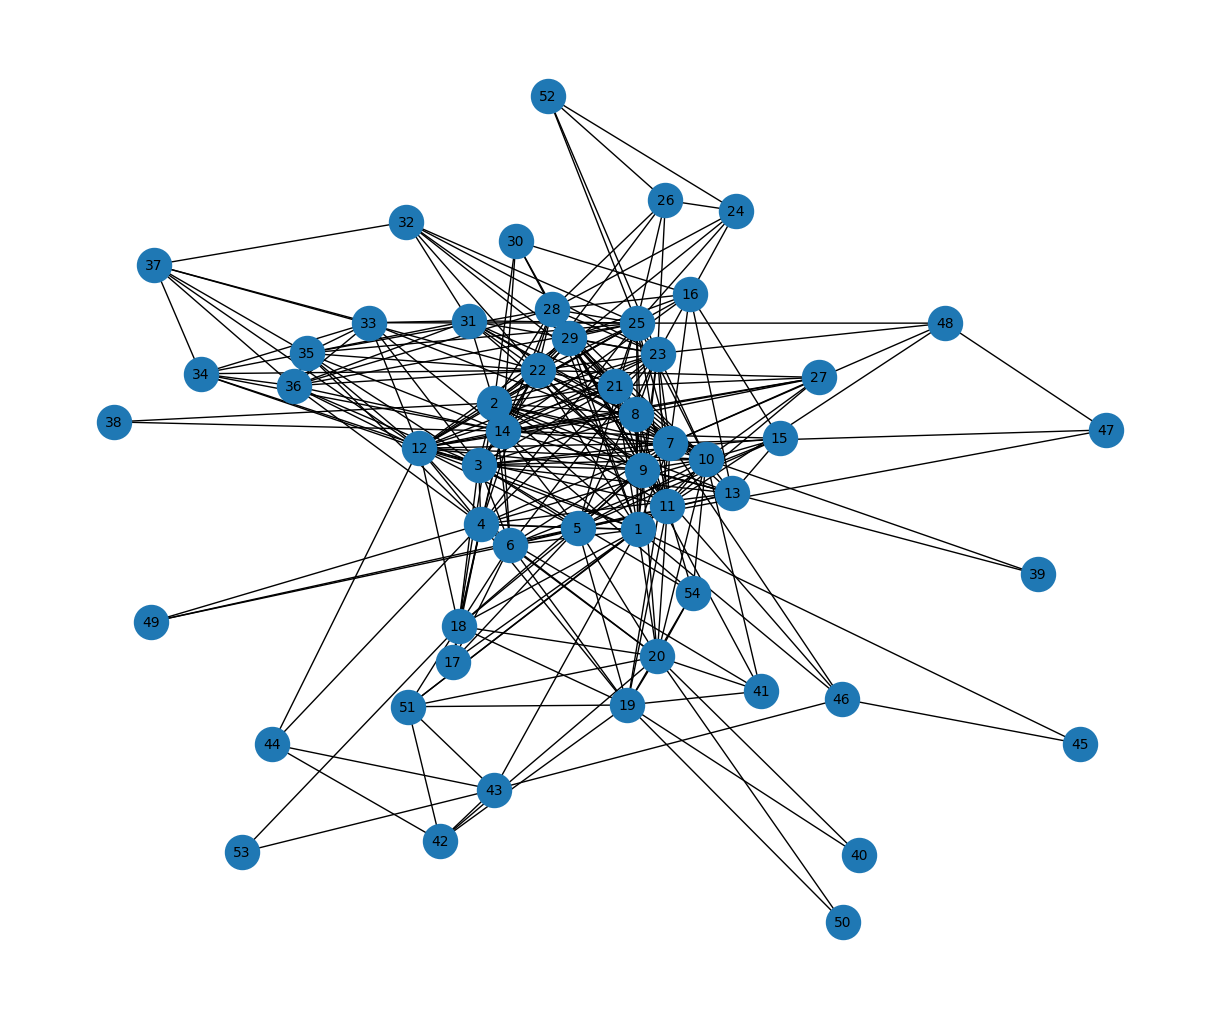

In [34]:
# Calcolo centralità
centrality = nx.degree_centrality(G)
print(centrality)

plot_graph(G)

## Within-network analysis (internal analysis of the gangs)

### A. General structural metrics
- **Density**
  - **What it is:** Ratio between existing ties and all possible ties.
  - **Why useful:** Measures cohesion; high density → easier communication and lower vulnerability to central node removal.

In [ ]:
# calcolato come: 2 * L / (N * (N - 1)) per grafi non diretti
density = nx.density(G)
print(f"Densità: {density:.4f}")
# Di tutti i possibili collegamenti, ne esistono il 22%

Densità: 0.2201


- **Average degree**
  - **What it is:** Average number of connections per node.
  - **Why useful:** Indicates member activity and level of engagement.

In [7]:
if num_nodes > 0:
    avg_degree = (2 * num_edges) / num_nodes
    print(f"Grado medio: {avg_degree:.4f}")

Grado medio: 11.6667


- **Network diameter and average path length**
  - **What it is:** Maximum/average length of paths between nodes.
  - **Why useful:** Measures the network's efficiency in transmitting information or orders.

In [10]:
G_largest = G.copy()

if nx.is_connected(G):
    print("La rete è connessa.")

else:
    print("La rete non è connessa.")

    components = list(nx.connected_components(G))
    largest_component = max(components, key=len)
    G_largest = G.subgraph(largest_component).copy()

    print(f"Info: Calcolo metriche sulla componente connessa più grande ({G_largest.number_of_nodes()} nodi).")

diameter = nx.diameter(G_largest)
print(f"Diametro Componente più grande: {diameter}")

avg_path_length = nx.average_shortest_path_length(G_largest)
print(f"Lunghezza media del cammino minimo: {avg_path_length:.4f}")


La rete è connessa.
Diametro Componente più grande: 4
Lunghezza media del cammino minimo: 2.0538


- **Clustering coefficient**
  - **What it is:** Probability that a node's neighbors are connected to each other.
  - **Why useful:** Highlights closed subgroups or internal "cells"; useful for understanding resilience and community str

In [11]:
avg_clustering_coefficient = nx.average_clustering(G)
print(f"Coefficiente di Clustering Medio: {avg_clustering_coefficient:.4f}")

Coefficiente di Clustering Medio: 0.6331


- **Modularity**
  - **What it is:** Measure of the presence of well-defined internal communities.
  - **Why useful:** Reveals internal divisions and possible subgroups or "cliques".

In [13]:
communities_partition = nx_comm.greedy_modularity_communities(G)

modularity_score = nx_comm.modularity(G, communities_partition)

print(f"Comunità Trovate: {len(communities_partition)}")
print(f"Modularità: {modularity_score:.4f}")

Comunità Trovate: 4
Modularità: 0.2665


### B. Centrality metrics
- **Degree centrality**
  - **What it is:** Number of direct connections a node has.
  - **Why useful:** Identifies the most active or influential members.

In [19]:
degree_cent = nx.degree_centrality(G)
print(f"Degree Centrality: {degree_cent}")

Degree Centrality: {1: 0.4716981132075472, 2: 0.4150943396226415, 3: 0.4150943396226415, 4: 0.3962264150943396, 5: 0.3584905660377358, 6: 0.3018867924528302, 7: 0.4716981132075472, 8: 0.2830188679245283, 9: 0.3962264150943396, 10: 0.4150943396226415, 11: 0.33962264150943394, 12: 0.4716981132075472, 13: 0.20754716981132074, 14: 0.4528301886792453, 15: 0.1320754716981132, 16: 0.1509433962264151, 17: 0.09433962264150943, 18: 0.2641509433962264, 19: 0.24528301886792453, 20: 0.2830188679245283, 21: 0.3584905660377358, 22: 0.4528301886792453, 23: 0.43396226415094336, 24: 0.11320754716981132, 25: 0.43396226415094336, 26: 0.11320754716981132, 27: 0.1509433962264151, 28: 0.33962264150943394, 29: 0.32075471698113206, 30: 0.09433962264150943, 31: 0.22641509433962265, 32: 0.1320754716981132, 33: 0.18867924528301885, 34: 0.1509433962264151, 35: 0.22641509433962265, 36: 0.22641509433962265, 37: 0.1320754716981132, 38: 0.03773584905660377, 39: 0.03773584905660377, 40: 0.03773584905660377, 41: 0.09433

- **Betweenness centrality**
  - **What it is:** Number of times a node lies on the shortest paths between other nodes.
  - **Why useful:** Highlights brokers or gatekeepers; nodes critical for the flow of information.


In [20]:
between_cent = nx.betweenness_centrality(G)
print(f"Betweenness Centrality: {between_cent}")

Betweenness Centrality: {1: 0.10866809640139242, 2: 0.04284181941526935, 3: 0.031634438004417495, 4: 0.07251111558950574, 5: 0.04802873093788527, 6: 0.024980454112911957, 7: 0.0754959228580171, 8: 0.0024890531641352815, 9: 0.04826053703206104, 10: 0.04834622067155578, 11: 0.034568098986732285, 12: 0.059583039948035356, 13: 0.004166919996020141, 14: 0.06402652077400323, 15: 0.001036648560233466, 16: 0.0029378307925540486, 17: 0.0, 18: 0.04451053729567141, 19: 0.04730038551415636, 20: 0.06367993791967964, 21: 0.010741028565712445, 22: 0.045002439394822166, 23: 0.05574677827644191, 24: 0.0007175345618741846, 25: 0.055702682123812915, 26: 0.0007175345618741846, 27: 0.00022446775082173446, 28: 0.02751077824676916, 29: 0.01391238475248795, 30: 6.597176408497163e-05, 31: 0.004624220461577288, 32: 0.001430454819851217, 33: 0.0036606812513023147, 34: 0.0007316078156170362, 35: 0.004973879009427997, 36: 0.004973879009427997, 37: 0.0013040663535278155, 38: 0.0, 39: 0.0, 40: 0.0, 41: 0.00063992611

- **Closeness centrality**
  - **What it is:** Reciprocal of the sum of a node's distances to all other nodes.
  - **Why useful:** A node close to all others can quickly spread information or orders.

In [21]:
closeness_cent = nx.closeness_centrality(G)
print(f"Closeness Centrality: {closeness_cent}")

Closeness Centrality: {1: 0.654320987654321, 2: 0.6091954022988506, 3: 0.6022727272727273, 4: 0.6162790697674418, 5: 0.6091954022988506, 6: 0.5824175824175825, 7: 0.654320987654321, 8: 0.5520833333333334, 9: 0.6162790697674418, 10: 0.6235294117647059, 11: 0.5824175824175825, 12: 0.6385542168674698, 13: 0.4953271028037383, 14: 0.6022727272727273, 15: 0.45689655172413796, 16: 0.4690265486725664, 17: 0.4491525423728814, 18: 0.5463917525773195, 19: 0.5096153846153846, 20: 0.5247524752475248, 21: 0.5760869565217391, 22: 0.6091954022988506, 23: 0.6091954022988506, 24: 0.424, 25: 0.6091954022988506, 26: 0.424, 27: 0.5096153846153846, 28: 0.5698924731182796, 29: 0.5638297872340425, 30: 0.43089430894308944, 31: 0.4953271028037383, 32: 0.43089430894308944, 33: 0.49074074074074076, 34: 0.452991452991453, 35: 0.5096153846153846, 36: 0.5096153846153846, 37: 0.4274193548387097, 38: 0.4108527131782946, 39: 0.3925925925925926, 40: 0.35570469798657717, 41: 0.45689655172413796, 42: 0.381294964028777, 43

- **Eigenvector centrality / PageRank**
  - **What it is:** Importance based on being connected to other important nodes.
  - **Why useful:** Highlights leaders recognized by the most influential members.

In [22]:
eigen_cent = nx.eigenvector_centrality(G, max_iter=1000)
print(f"Eigenvector Centrality: {eigen_cent}")

Eigenvector Centrality: {1: 0.23665702194744806, 2: 0.22909462474624814, 3: 0.2169694517358045, 4: 0.17471026885621538, 5: 0.17387852361649495, 6: 0.14864363486244733, 7: 0.24334709016982065, 8: 0.18283229048634403, 9: 0.215686487342014, 10: 0.2224482461593444, 11: 0.18740596328795753, 12: 0.24942870058999023, 13: 0.11421610313021918, 14: 0.2058069730896697, 15: 0.0652172836256356, 16: 0.07519619792685812, 17: 0.05062611516741732, 18: 0.12731639557188454, 19: 0.07924680559129708, 20: 0.10320090206015388, 21: 0.21530464953631728, 22: 0.2351956670087189, 23: 0.22965681635240887, 24: 0.055809162729650946, 25: 0.21781693512406777, 26: 0.055809162729650946, 27: 0.10528411057634135, 28: 0.17804782619655082, 29: 0.1917311208727059, 30: 0.051722983984801595, 31: 0.12620154526079508, 32: 0.07479043010162996, 33: 0.09525632012351401, 34: 0.07570360563139174, 35: 0.11438907657538212, 36: 0.11438907657538212, 37: 0.056383044878599804, 38: 0.025565478250753434, 39: 0.025755480755314714, 40: 0.01072

- **Centrality results**

In [28]:
df_centrality = pd.DataFrame({
    'degree': degree_cent,
    'betweenness': between_cent,
    'closeness': closeness_cent,
    'eigenvector': eigen_cent
})
df_centrality.index.name = 'Node'

print("\n--- Top 5 Nodi per Degree Centrality (Popolarità) ---")
print(df_centrality.sort_values(by='degree', ascending=False).head().to_markdown(floatfmt=".4f"))

print("\n--- Top 5 Nodi per Betweenness Centrality (Broker) ---")
print(df_centrality.sort_values(by='betweenness', ascending=False).head().to_markdown(floatfmt=".4f"))

print("\n--- Top 5 Nodi per Closeness Centrality (Efficienza) ---")
print(df_centrality.sort_values(by='closeness', ascending=False).head().to_markdown(floatfmt=".4f"))

print("\n--- Top 5 Nodi per Eigenvector Centrality (Influenza) ---")
print(df_centrality.sort_values(by='eigenvector', ascending=False).head().to_markdown(floatfmt=".4f"))


--- Top 5 Nodi per Degree Centrality (Popolarità) ---
|   Node |   degree |   betweenness |   closeness |   eigenvector |
|-------:|---------:|--------------:|------------:|--------------:|
|      1 |   0.4717 |        0.1087 |      0.6543 |        0.2367 |
|      7 |   0.4717 |        0.0755 |      0.6543 |        0.2433 |
|     12 |   0.4717 |        0.0596 |      0.6386 |        0.2494 |
|     14 |   0.4528 |        0.0640 |      0.6023 |        0.2058 |
|     22 |   0.4528 |        0.0450 |      0.6092 |        0.2352 |

--- Top 5 Nodi per Betweenness Centrality (Broker) ---
|   Node |   degree |   betweenness |   closeness |   eigenvector |
|-------:|---------:|--------------:|------------:|--------------:|
|      1 |   0.4717 |        0.1087 |      0.6543 |        0.2367 |
|      7 |   0.4717 |        0.0755 |      0.6543 |        0.2433 |
|      4 |   0.3962 |        0.0725 |      0.6163 |        0.1747 |
|     14 |   0.4528 |        0.0640 |      0.6023 |        0.2058 |
|    

### C. Roles and vulnerability
- **Identification of key roles (leader, broker, peripheral members)**
  - **Metrics:** Combination of centrality, degree, betweenness, and clustering.
  - **Why useful:** Identifies who leads, who mediates between subgroups, and who remains peripheral.


In [30]:
high_thresh = 0.85
low_thresh = 0.15

degree_high_thresh = df_centrality['degree'].quantile(high_thresh)
eigen_high_thresh = df_centrality['eigenvector'].quantile(high_thresh)
between_high_thresh = df_centrality['betweenness'].quantile(high_thresh)
degree_low_thresh = df_centrality['degree'].quantile(low_thresh)

leaders = df_centrality[
    (df_centrality['degree'] >= degree_high_thresh) &
    (df_centrality['eigenvector'] >= eigen_high_thresh)
]

brokers = df_centrality[
    (df_centrality['betweenness'] >= between_high_thresh)
]

peripherals = df_centrality[
    (df_centrality['degree'] <= degree_low_thresh)
]

print(f"\n--- Leader (Degree >= {degree_high_thresh:.4f} & Eigenvector >= {eigen_high_thresh:.4f}) ---")
print(leaders.sort_values(by='degree', ascending=False).to_markdown(floatfmt=".4f"))

print(f"\n--- Broker (Betweenness >= {between_high_thresh:.4f}) ---")
print(brokers.sort_values(by='betweenness', ascending=False).to_markdown(floatfmt=".4f"))

print(f"\n--- Peripheral (Degree <= {degree_low_thresh:.4f}) ---")
print(peripherals.sort_values(by='degree', ascending=True).to_markdown(floatfmt=".4f"))


--- Leader (Degree >= 0.4151 & Eigenvector >= 0.2170) ---
|   Node |   degree |   betweenness |   closeness |   eigenvector |
|-------:|---------:|--------------:|------------:|--------------:|
|      1 |   0.4717 |        0.1087 |      0.6543 |        0.2367 |
|      7 |   0.4717 |        0.0755 |      0.6543 |        0.2433 |
|     12 |   0.4717 |        0.0596 |      0.6386 |        0.2494 |
|     22 |   0.4528 |        0.0450 |      0.6092 |        0.2352 |
|     23 |   0.4340 |        0.0557 |      0.6092 |        0.2297 |
|     25 |   0.4340 |        0.0557 |      0.6092 |        0.2178 |
|     10 |   0.4151 |        0.0483 |      0.6235 |        0.2224 |
|      2 |   0.4151 |        0.0428 |      0.6092 |        0.2291 |

--- Broker (Betweenness >= 0.0487) ---
|   Node |   degree |   betweenness |   closeness |   eigenvector |
|-------:|---------:|--------------:|------------:|--------------:|
|      1 |   0.4717 |        0.1087 |      0.6543 |        0.2367 |
|      7 |   0.47

- **K-core / core-periphery structure**
  - **What it is:** Identifies the central core versus the periphery.
  - **Why useful:** Highlights implicit hierarchy and concentration of power.

In [31]:
# Il k-core è un sottografo dove ogni nodo ha almeno grado 'k'

core_numbers = nx.core_number(G)

# main core della rete.
max_k = max(core_numbers.values())

print(f"Il 'main core' della rete ha un valore k = {max_k}")

# Filtriamo per trovare i nodi che appartengono a questo core
main_core_nodes = [node for node, k in core_numbers.items() if k == max_k]

print(f"Ci sono {len(main_core_nodes)} nodi (su {G.number_of_nodes()}) in questo core principale.")
print(f"Nodi nel 'Core' (k={max_k}): {main_core_nodes}")

Il 'main core' della rete ha un valore k = 11
Ci sono 13 nodi (su 54) in questo core principale.
Nodi nel 'Core' (k=11): [1, 2, 7, 8, 9, 10, 11, 12, 21, 22, 23, 25, 29]


- **Cohesion / network robustness**
  - **Metrics:** Density, average path length, k-core decomposition.
  - **Why useful:** Vulnerability testing: impact of removing central nodes.

Dopo la rimozione, la rete è ancora connessa.
Dopo la rimozione, la lunghezza media del cammino minimo è: 2.2180
Dopo la rimozione, la densità della rete è: 0.1906

IMPATTO DELLA RIMOZIONE:
	- Riduzione Nodi: 5.56%
	- Aumento Percorso Medio: 8.00%

Visualizzazione del grafo dopo la rimozione dei nodi chiave:


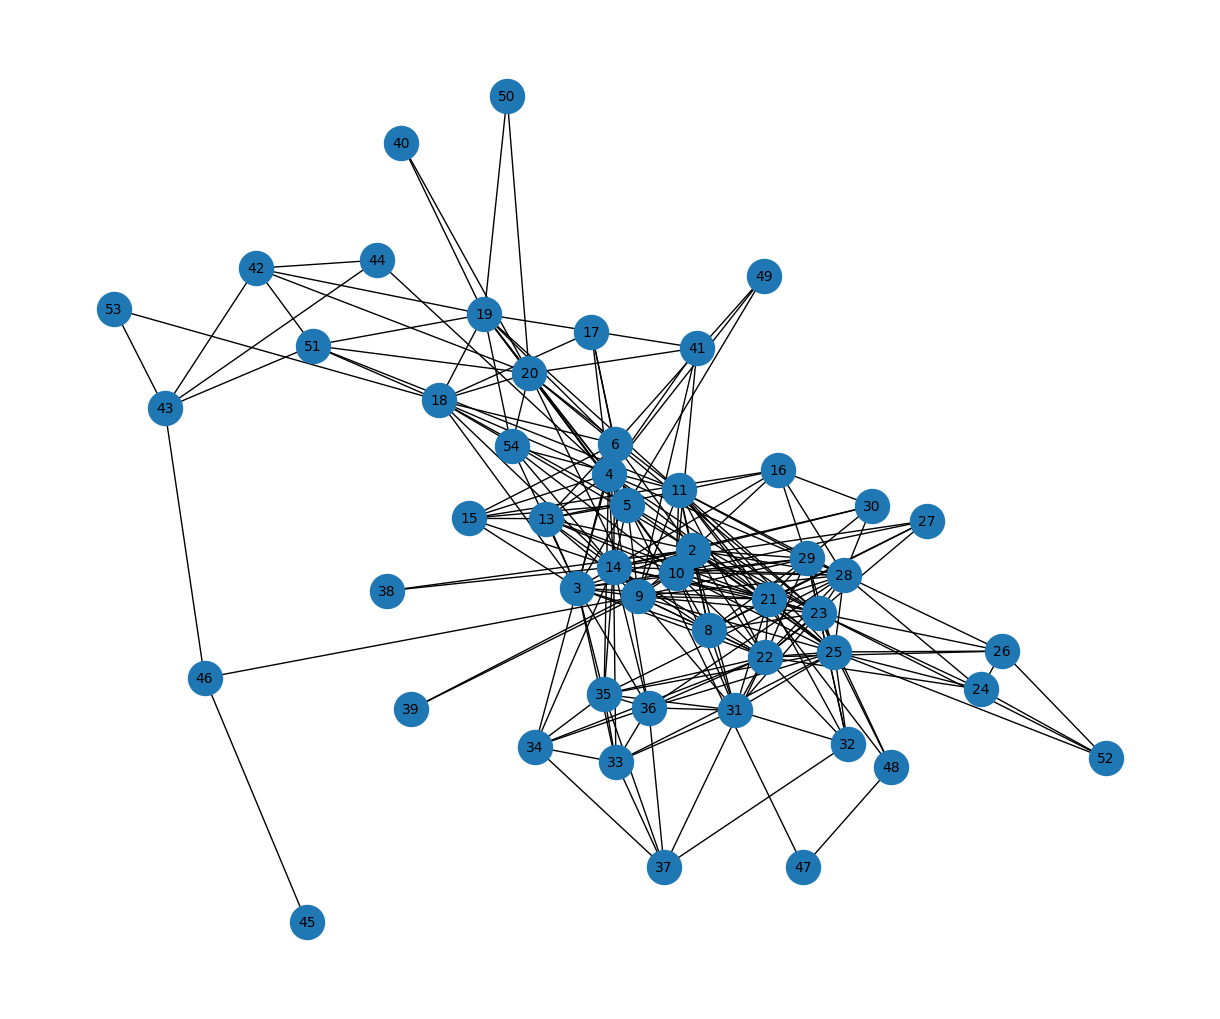

In [ ]:
# Rimozione dei leader principali
nodes_to_remove = [1, 7, 12]

G_vulnerable = G.copy()
G_vulnerable.remove_nodes_from(nodes_to_remove)
G_largest_vuln = G_vulnerable.copy()

if nx.is_connected(G_vulnerable):
    print("Dopo la rimozione, la rete è ancora connessa.")
    G_largest_vuln = G_vulnerable
    num_nodes_vuln = G_largest_vuln.number_of_nodes()
else:
    print("Dopo la rimozione, la rete non è più connessa.")
    components_vuln = list(nx.connected_components(G_vulnerable))
    largest_component_vuln = max(components_vuln, key=len)
    G_largest_vuln = G_vulnerable.subgraph(largest_component_vuln).copy()
    num_nodes_vuln = G_largest_vuln.number_of_nodes()
    print(f"\t- Nodi (Componente Max): {num_nodes_vuln} (su {G_vulnerable.number_of_nodes()} rimasti)")
    print(f"\t- N. di Frammenti Totali: {len(components_vuln)}")

new_avg_path_length = nx.average_shortest_path_length(G_largest_vuln)
new_density = nx.density(G_largest_vuln)
print(f"Dopo la rimozione, la lunghezza media del cammino minimo è: {new_avg_path_length:.4f}")
print(f"Dopo la rimozione, la densità della rete è: {new_density:.4f}")

print("\nIMPATTO DELLA RIMOZIONE:")
nodes_lost_pct = (num_nodes - num_nodes_vuln) / num_nodes
print(f"\t- Riduzione Nodi: {nodes_lost_pct:.2%}")

path_increase_pct = (new_avg_path_length - avg_path_length) / avg_path_length
print(f"\t- Aumento Percorso Medio: {path_increase_pct:.2%}")

print("\nVisualizzazione del grafo dopo la rimozione dei nodi chiave:")
plot_graph(G_vulnerable)